**1.Gerekli Kütüphaneleri Yükleyelim.**

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

**2.Veri seti olarak "keras" kütüphanesinden "fashion_mnist" seçtim.**

In [5]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


**3.X_Train, Y_Train, X_Test, Y_Test boyutlarına bakalım.**

In [6]:
X_train.shape

(60000, 28, 28)

*#Yukarıdaki kodun çıktısına baktığımızda "X_train" değişkenindeki veri setinin 60000 adet 28x28 piksel boyutunda görüntü içerdiğini söyleyebiliriz.*

In [7]:
y_train.shape

(60000,)

*#Yukarıdaki kodun çıktısına baktığımızda "y_train" değişkenindeki veri setinde 60000 adet örnek bulunuyor.*



In [8]:
X_test.shape

(10000, 28, 28)

*#Yukarıdaki kodun çıktısına baktığımızda "X_test" değişkenindeki veri setinin 10000 adet 28x28 piksel boyutunda ve üç renk kanalıyla (RGB) görüntü içerdiğini söyleyebiliriz.*

In [9]:
y_test.shape

(10000,)

*#Yukarıdaki kodun çıktısına baktığımızda "y_test" değişkenindeki veri setinde 10000 adet örnek bulunuyor.*

*#Sonuç olarak 60000 tane eğitim,10000 tane test görüntümüz vardır ve veriler 28x28 piksel boyutundadır.*

**4. Verileri Görselleştirelim(Rastgele).**

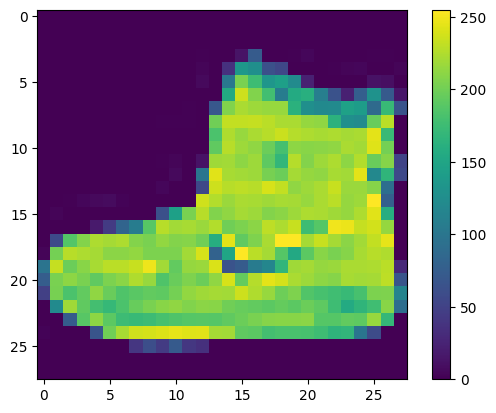

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

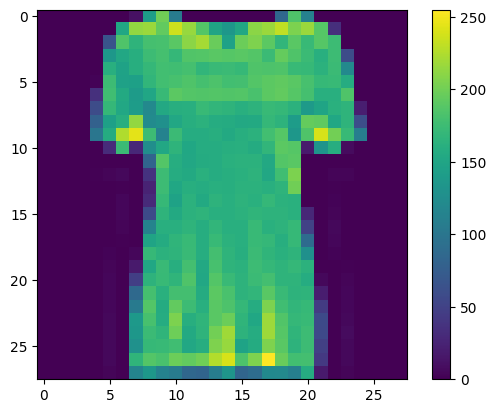

In [11]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

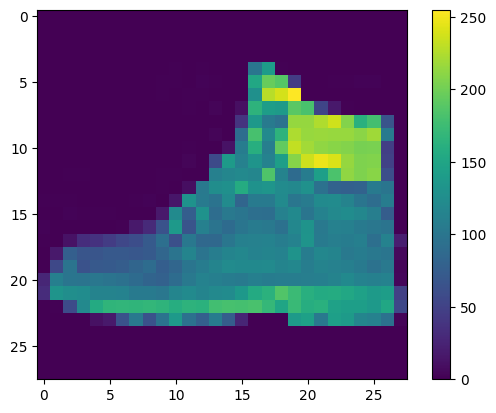

In [12]:
plt.figure()
plt.imshow(X_train[90])
plt.colorbar()
plt.grid(False)
plt.show()

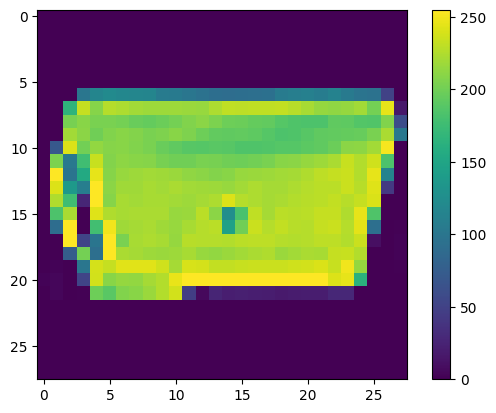

In [13]:
plt.figure()
plt.imshow(X_train[110])
plt.colorbar()
plt.grid(False)
plt.show()

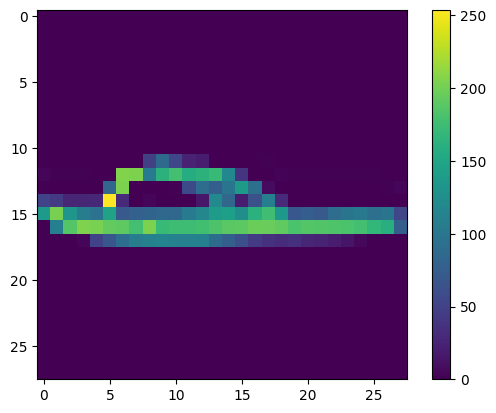

In [14]:
plt.figure()
plt.imshow(X_train[30])
plt.colorbar()
plt.grid(False)
plt.show()

**5.Verileri Normalleştirelim.**

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

*#En büyük piksel değeri 255 olduğu için her bir veriyi 255'e böleriz. Böylelikle en büyük değerimiz 0'a yakın en küçük değerimiz 1'e yakın olacak.*

**6. 30 Veriyi Tek Seferde Görselleştirelim.**

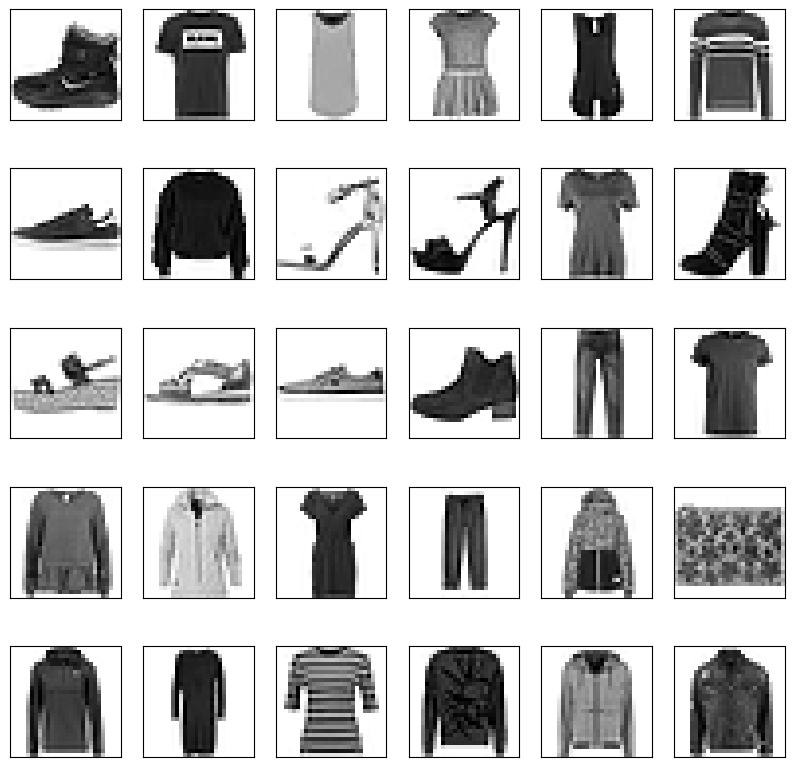

In [16]:
plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

**7.Makine Öğrenmesi Modelini Oluşturalım.**

In [17]:
X_train.shape[0]

60000

*# Yukarıda verisetindeki örnek sayısının 60000 olduğunu gördük.*

**8.Verileri Tek Boyutlu Vektörlere Dönüştürelim.**

In [18]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


*# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. Yukarıda 28x28 piksel boyutundaki görüntüleri 784 birimlik vektöre dönüştürme işlemini yaptık. (28x28=784)*

**9.KNN,Random Forest ve Decision Tree Modellerini Sırayla Uygulayalım ve En İyiyi Bulmaya Çalışalım.**

**KNN**

In [19]:
!pip install scikit-learn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

In [20]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [21]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.8554
F1 Skoru: 0.8546
Geri Çağırma (Recall): 0.8554
Kesinlik (Precision): 0.8578


**Random Forest**

In [22]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [23]:
y_pred=rf.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [24]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.8759
F1 Skoru: 0.8744
Geri Çağırma (Recall): 0.8759
Kesinlik (Precision): 0.8745


**Decision Tree**

In [25]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [26]:
y_pred=dt.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [27]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.7924
F1 Skoru: 0.7928
Geri Çağırma (Recall): 0.7924
Kesinlik (Precision): 0.7935


***# YORUMLARIM:***

*Yukarıda üç farklı makine öğrenmesi modeli kullandım. Her üç modelin performansını aşağıdaki parametreler bazında kıyaslamak istiyorum. Değerleri ayrı ayrı ele alalım:*

***# Accuracy (Doğruluk):***

*#Accuracy, modelin doğru tahmin ettiği örneklerin oranını gösterir.KNN,Random Forest ve Decision Tree modellerine bakıldığında en iyi değerin 0.8759 ile Random Forest modeli olduğunu görmekteyiz.*

***#F1 Score:***

*#F1 skoru, precision ve recall metriklerinin harmonik ortalamasıdır ve sınıf dengesizliği durumunda tercih edilen bir metriktir. KNN,Random Forest ve Decision Tree modellerine bakıldığında en iyi değerin 0.8744 ile Random Forest modeli olduğunu görmekteyiz.*

***#Recall (Geri Çağırma):***

*#Recall, gerçekte pozitif olan örneklerin ne kadarını doğru bir şekilde tanımladığımızı gösterir. Modelimizin gerçek pozitifleri ne kadar başarıyla yakaladığını ifade eder.KNN,Random Forest ve Decision Tree modellerine bakıldığında en iyi değerin 0.8759 ile Random Forest modeli olduğunu görmekteyiz.*

***#Precision (Kesinlik):***

*#Precision, modelimizin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Modelimizin pozitif tahminlerinin ne kadarının doğru olduğunu gösterir.KNN,Random Forest ve Decision Tree modellerine bakıldığında en iyi değerin 0.8745 ile Random Forest modeli olduğunu görmekteyiz.*

*#Bu metrikler genel olarak her üç modelin de kendi içinde metrikler bazında birbirleriyle uyumlu ve yüksek performans gösteren birer model olduklarını gösteriyor. Ancak, 4 metrikte de random forest modeli daha iyi sonuç vermiştir. Bu sebeple bu modeli tercih etmeliyiz. Elbette bu en iyi sonuçtur diyemeyiz. Farklı modeller denenerek ya da mevcut model üzerinde değişiklikler yaparak modeli daha iyi eğiterek daha iyi sonuç alabiliriz.*